# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
act = pd.read_csv('/Users/gadamico/dsi/dsi_wk_1/project-1/data/act.csv')
sat = pd.read_csv('/Users/gadamico/dsi/dsi_wk_1/project-1/data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [3]:
act[:10]

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
sat[:10]

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

The first two columns in each table are the state (in the union) where the data were collected and the level of participation. Presumably this is something like the number of districts reporting. After that are the scores for the various sections of each test. The ACT has English, Math, Reading, and Science sections, whereas the SAT has an Evidence-Based Reading and Writing section and a Math section. The ACT includes a Composite score, which is something like an average, while the SAT includes also a Total score, which is simply the sum of the Reading and Math scores.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [5]:
act.isnull().sum()

Unnamed: 0       0
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [6]:
sat.isnull().sum()

Unnamed: 0                            0
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

No missing values. That's good!

In [7]:
sat.loc[sat['Math'] < 200]

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,20,Maryland,69%,536,52,1060


A little funny business with Maryland here. The math score looks suspiciously, if not impossibly, low.

In [8]:
sat.loc[sat['Evidence-Based Reading and Writing'] < 200]

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [9]:
act.loc[act['English'] < 15]

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite


In [10]:
act.loc[act['Math'] < 15]

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite


In [11]:
act.loc[act['Reading'] < 15]

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite


In [12]:
act.loc[act['Science'] < 15]

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
21,21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Again: Something strange here. Presumably these are errors in data entry.

In [13]:
act.loc[act['Composite'] < 15]

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite


##### 5. Print the types of each column.

In [14]:
act.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [15]:
sat.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

It will prove useful to have our Particpation values as integers.

In [2]:
act['Participation'] = [string.replace('%', '') for string in act['Participation']]
num_act_ptcpn = [int(string) for string in act['Participation']]
act['Participation'] = num_act_ptcpn

sat['Participation'] = [string.replace('%', '') for string in sat['Participation']]
num_sat_ptcpn = [int(string) for string in sat['Participation']]
sat['Participation'] = num_sat_ptcpn

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [17]:
sat_keys = sat['State']
reading = sat['Evidence-Based Reading and Writing']
sat_reading = dict(zip(sat_keys, reading))

In [18]:
math = sat['Math']
sat_math = dict(zip(sat_keys, math))

In [8]:
total = sat['Total']
sat_total = dict(zip(sat_keys, total))

In [9]:
act_keys = act['State']
english = act['English']
act_reading = dict(zip(act_keys, english))

In [10]:
math2 = act['Math']
act_math = dict(zip(act_keys, math2))

In [11]:
reading2 = act['Reading']
act_reading = dict(zip(act_keys, reading2))

In [12]:
science = act['Science']
act_science = dict(zip(act_keys, science))

In [13]:
composite = act['Composite']
act_composite = dict(zip(act_keys, composite))

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [14]:
sat_dict = sat.to_dict()
act_dict = act.to_dict()

##### 9. Merge the dataframes on the state column.

In [3]:
act_sat_merge = act.merge(sat, 'outer', on = 'State')

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [4]:
act_sat_merge.columns = ['ACT ID', 'State', 'ACT Ptcpn', 'ACT Eng', 'ACT Math', 'ACT Read', 'ACT Sci', 'ACT Comp', 'SAT ID', 'SAT Ptcpn', 'SAT Verbal', 'SAT Math', 'SAT Total']

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [6]:
print('The minimum state average for ACT English is:', act_sat_merge['ACT Eng'].min())
print('The maximum state average for ACT English is:', act_sat_merge['ACT Eng'].max())
print('The minimum state average for ACT Math is:', act_sat_merge['ACT Math'].min())
print('The maximum state average for ACT Math is:', act_sat_merge['ACT Math'].max())
print('The minimum state average for ACT Reading is:', act_sat_merge['ACT Read'].min())
print('The maximum state average for ACT Reading is:' ,act_sat_merge['ACT Read'].max())
print('The minimum state average for ACT Science is:', act_sat_merge['ACT Sci'].min())
print('The maximum state average for ACT Science is:', act_sat_merge['ACT Sci'].max())
print('The minimum state average for ACT Composite is:', act_sat_merge['ACT Comp'].min())
print('The maximum state average for ACT Composite is:', act_sat_merge['ACT Comp'].max())
print('The minimum state average for SAT Verbal is:', act_sat_merge['SAT Verbal'].min())
print('The maximum state average for SAT Verbal is:', act_sat_merge['SAT Verbal'].max())
print('The minimum state average for SAT Math is:', act_sat_merge['SAT Math'].min())
print('The maximum state average for SAT Math is:', act_sat_merge['SAT Math'].max())
print('The minimum state average for SAT Total is:', act_sat_merge['SAT Total'].min())
print('The maximum state average for SAT Total is:', act_sat_merge['SAT Total'].max())

The minimum state average for ACT English is: 16.3
The maximum state average for ACT English is: 25.5
The minimum state average for ACT Math is: 18.0
The maximum state average for ACT Math is: 25.3
The minimum state average for ACT Reading is: 18.1
The maximum state average for ACT Reading is: 26.0
The minimum state average for ACT Science is: 2.3
The maximum state average for ACT Science is: 24.9
The minimum state average for ACT Composite is: 17.8
The maximum state average for ACT Composite is: 25.5
The minimum state average for SAT Verbal is: 482.0
The maximum state average for SAT Verbal is: 644.0
The minimum state average for SAT Math is: 52.0
The maximum state average for SAT Math is: 651.0
The minimum state average for SAT Total is: 950.0
The maximum state average for SAT Total is: 1295.0


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [8]:
def st_dev(listin):
    import numpy as np
    list_mean = np.mean(listin)
    err = [(num - list_mean) ** 2 for num in listin]
    return np.sqrt(1 / len(listin) * sum(err))

We'll create ```sd``` in two steps, the complication arising from the fact that the values in the first row of the SAT columns are ```NaN```s.

In [9]:
sd = []
for col in ['ACT Eng', 'ACT Math', 'ACT Read', 'ACT Sci', 'ACT Comp']:
    sd.append(st_dev(act_sat_merge[col]))
for col in ['SAT Verbal', 'SAT Math', 'SAT Total']:
    sd.append(st_dev(act_sat_merge[col][1:]))

In [10]:
sd

[2.3095985716418723,
 1.9446292295028094,
 2.0288771415788838,
 3.120666818250956,
 1.9827389384951444,
 45.21697020437866,
 84.07255521608297,
 91.58351056778743]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

We'll begin by turning sd into a dictionary. Then we'll turn it into a data frame that can be appended to our existing ```act_sat_merge``` data frame. There is one extra step, which I'll explain below inline.

In [17]:
num_col = ['ACT Eng', 'ACT Math', 'ACT Read', 'ACT Sci', 'ACT Comp', 'SAT Verbal', 'SAT Math', 'SAT Total']
sd_dict = dict(zip(num_col, [value for value in sd]))

# The extra step is here. The .DataFrame command, when applied to a dictionary, expects lists as the dictionary's
# values. Thus we must convert the scalars into (1-element) lists before proceeding.

for key, value in sd_dict.items():
    sd_dict[key] = list([value])
sd_df = pd.DataFrame(sd_dict)
act_sat_plus_stdev = act_sat_merge.append(sd_df)

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [23]:
act_sat_plus_stdev.sort_values(by = 'ACT Comp')

,ACT Comp,ACT Eng,ACT ID,ACT Math,ACT Ptcpn,ACT Read,ACT Sci,SAT ID,SAT Math,SAT Ptcpn,SAT Total,SAT Verbal,State
0,1.982739,2.309599,NaN,1.944629,NaN,2.028877,3.120667,NaN,84.072555,NaN,91.583511,45.21697,NaN
29,17.800000,16.300000,29.0,18.000000,100.0,18.100000,18.200000,28.0,553.000000,26.0,1116.000000,563.00000,Nevada
25,18.600000,18.200000,25.0,18.100000,100.0,18.800000,18.800000,24.0,607.000000,2.0,1242.000000,634.00000,Mississippi
41,18.700000,17.500000,41.0,18.600000,100.0,19.100000,18.900000,40.0,521.000000,50.0,1064.000000,543.00000,South Carolina
12,19.000000,17.800000,12.0,19.200000,90.0,19.200000,19.300000,11.0,541.000000,55.0,1085.000000,544.00000,Hawaii
34,19.100000,17.800000,34.0,19.300000,100.0,19.600000,19.300000,33.0,535.000000,49.0,1081.000000,546.00000,North Carolina
1,19.200000,18.900000,1.0,18.400000,100.0,19.700000,19.400000,0.0,572.000000,5.0,1165.000000,593.00000,Alabama
4,19.400000,18.900000,4.0,19.000000,100.0,19.700000,19.500000,3.0,594.000000,3.0,1208.000000,614.00000,Arkansas
37,19.400000,18.500000,37.0,18.800000,100.0,20.100000,19.600000,36.0,517.000000,7.0,1047.000000,530.00000,Oklahoma
19,19.500000,19.400000,19.0,18.800000,100.0,19.800000,19.600000,18.0,586.000000,4.0,1198.000000,611.00000,Louisiana


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [31]:
act_sat_plus_stdev[act_sat_plus_stdev['SAT Math'] > 650]

,ACT Comp,ACT Eng,ACT ID,ACT Math,ACT Ptcpn,ACT Read,ACT Sci,SAT ID,SAT Math,SAT Ptcpn,SAT Total,SAT Verbal,State
24,21.5,20.4,24.0,21.5,100.0,21.8,21.6,23.0,651.0,3.0,1295.0,644.0,Minnesota


Well. Hooray for Minnesota.

## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

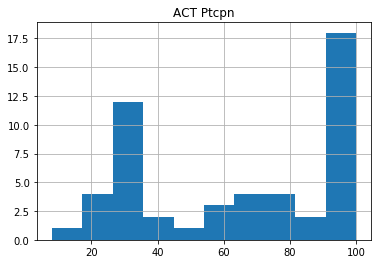

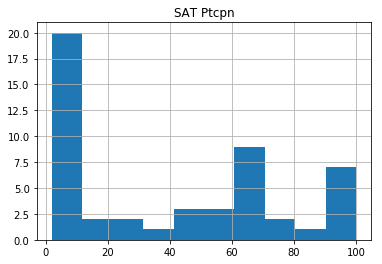

In [23]:
import matplotlib.pyplot as plt
pd.DataFrame.hist(act_sat_plus_stdev.iloc[0:51], column = 'ACT Ptcpn');
pd.DataFrame.hist(act_sat_plus_stdev.iloc[0:51], column = 'SAT Ptcpn');

##### 17. Plot the Math(s) distributions from both data sets.

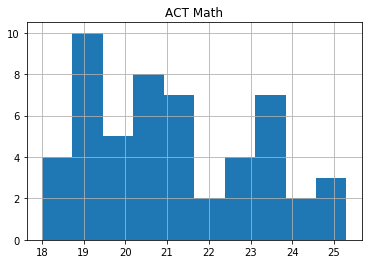

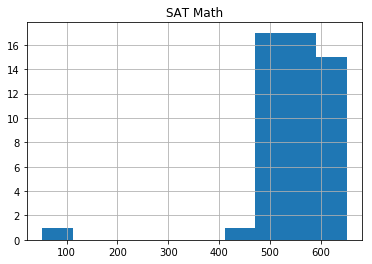

In [24]:
pd.DataFrame.hist(act_sat_merge, column = 'ACT Math');
pd.DataFrame.hist(act_sat_merge, column = 'SAT Math');

##### 18. Plot the Verbal distributions from both data sets.

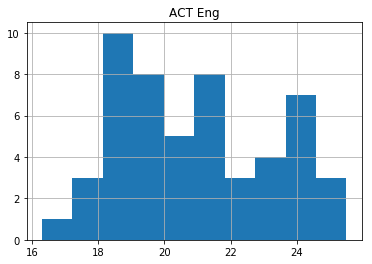

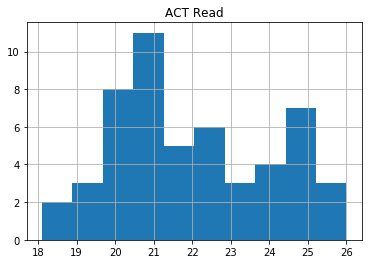

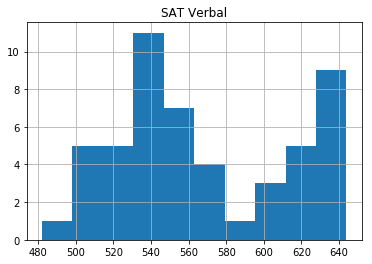

In [25]:
pd.DataFrame.hist(act_sat_merge, column = 'ACT Eng');
pd.DataFrame.hist(act_sat_merge, column = 'ACT Read')
pd.DataFrame.hist(act_sat_merge, column = 'SAT Verbal');

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

The most common assumption is that data are normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

In [5]:
import numpy as np
import scipy.stats as stats
stats.normaltest(act_sat_merge['ACT Comp'])

NormaltestResult(statistic=5.9631894854929515, pvalue=0.050711896915479296)

In [29]:
stats.normaltest(act_sat_merge['ACT Eng'])

NormaltestResult(statistic=4.542884284806752, pvalue=0.10316329658882092)

In [30]:
stats.normaltest(act_sat_merge['ACT Math'])

NormaltestResult(statistic=5.954266581476391, pvalue=0.050938651060063525)

In [31]:
stats.normaltest(act_sat_merge['ACT Read'])

NormaltestResult(statistic=5.683290135884425, pvalue=0.05832963078827297)

In [32]:
stats.normaltest(act_sat_merge['ACT Sci'])

NormaltestResult(statistic=79.07419687716373, pvalue=6.7492624706744785e-18)

In [41]:
stats.normaltest(act_sat_merge['ACT Ptcpn'])

NormaltestResult(statistic=66.13149515171078, pvalue=4.362428156877022e-15)

The ACT scores themselves are plausibly normal. The science score gets a very low p-value, but we already know that there's a serious outlier there. The participation values, however, seem not to be normally distributed at all.

In [43]:
stats.normaltest(act_sat_merge['SAT Total'][1:])

NormaltestResult(statistic=9.607185954097002, pvalue=0.008200230814088539)

In [44]:
stats.normaltest(act_sat_merge['SAT Verbal'][1:])

NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584)

In [45]:
stats.normaltest(act_sat_merge['SAT Math'][1:])

NormaltestResult(statistic=75.69485703674906, pvalue=3.656542623320732e-17)

The SAT values, by contrast, seem not to obey a normal distribution. The p-value for the math score is very low, but again we know there is an outlier lurking there.

##### 21. Plot some scatterplots examining relationships between all variables.

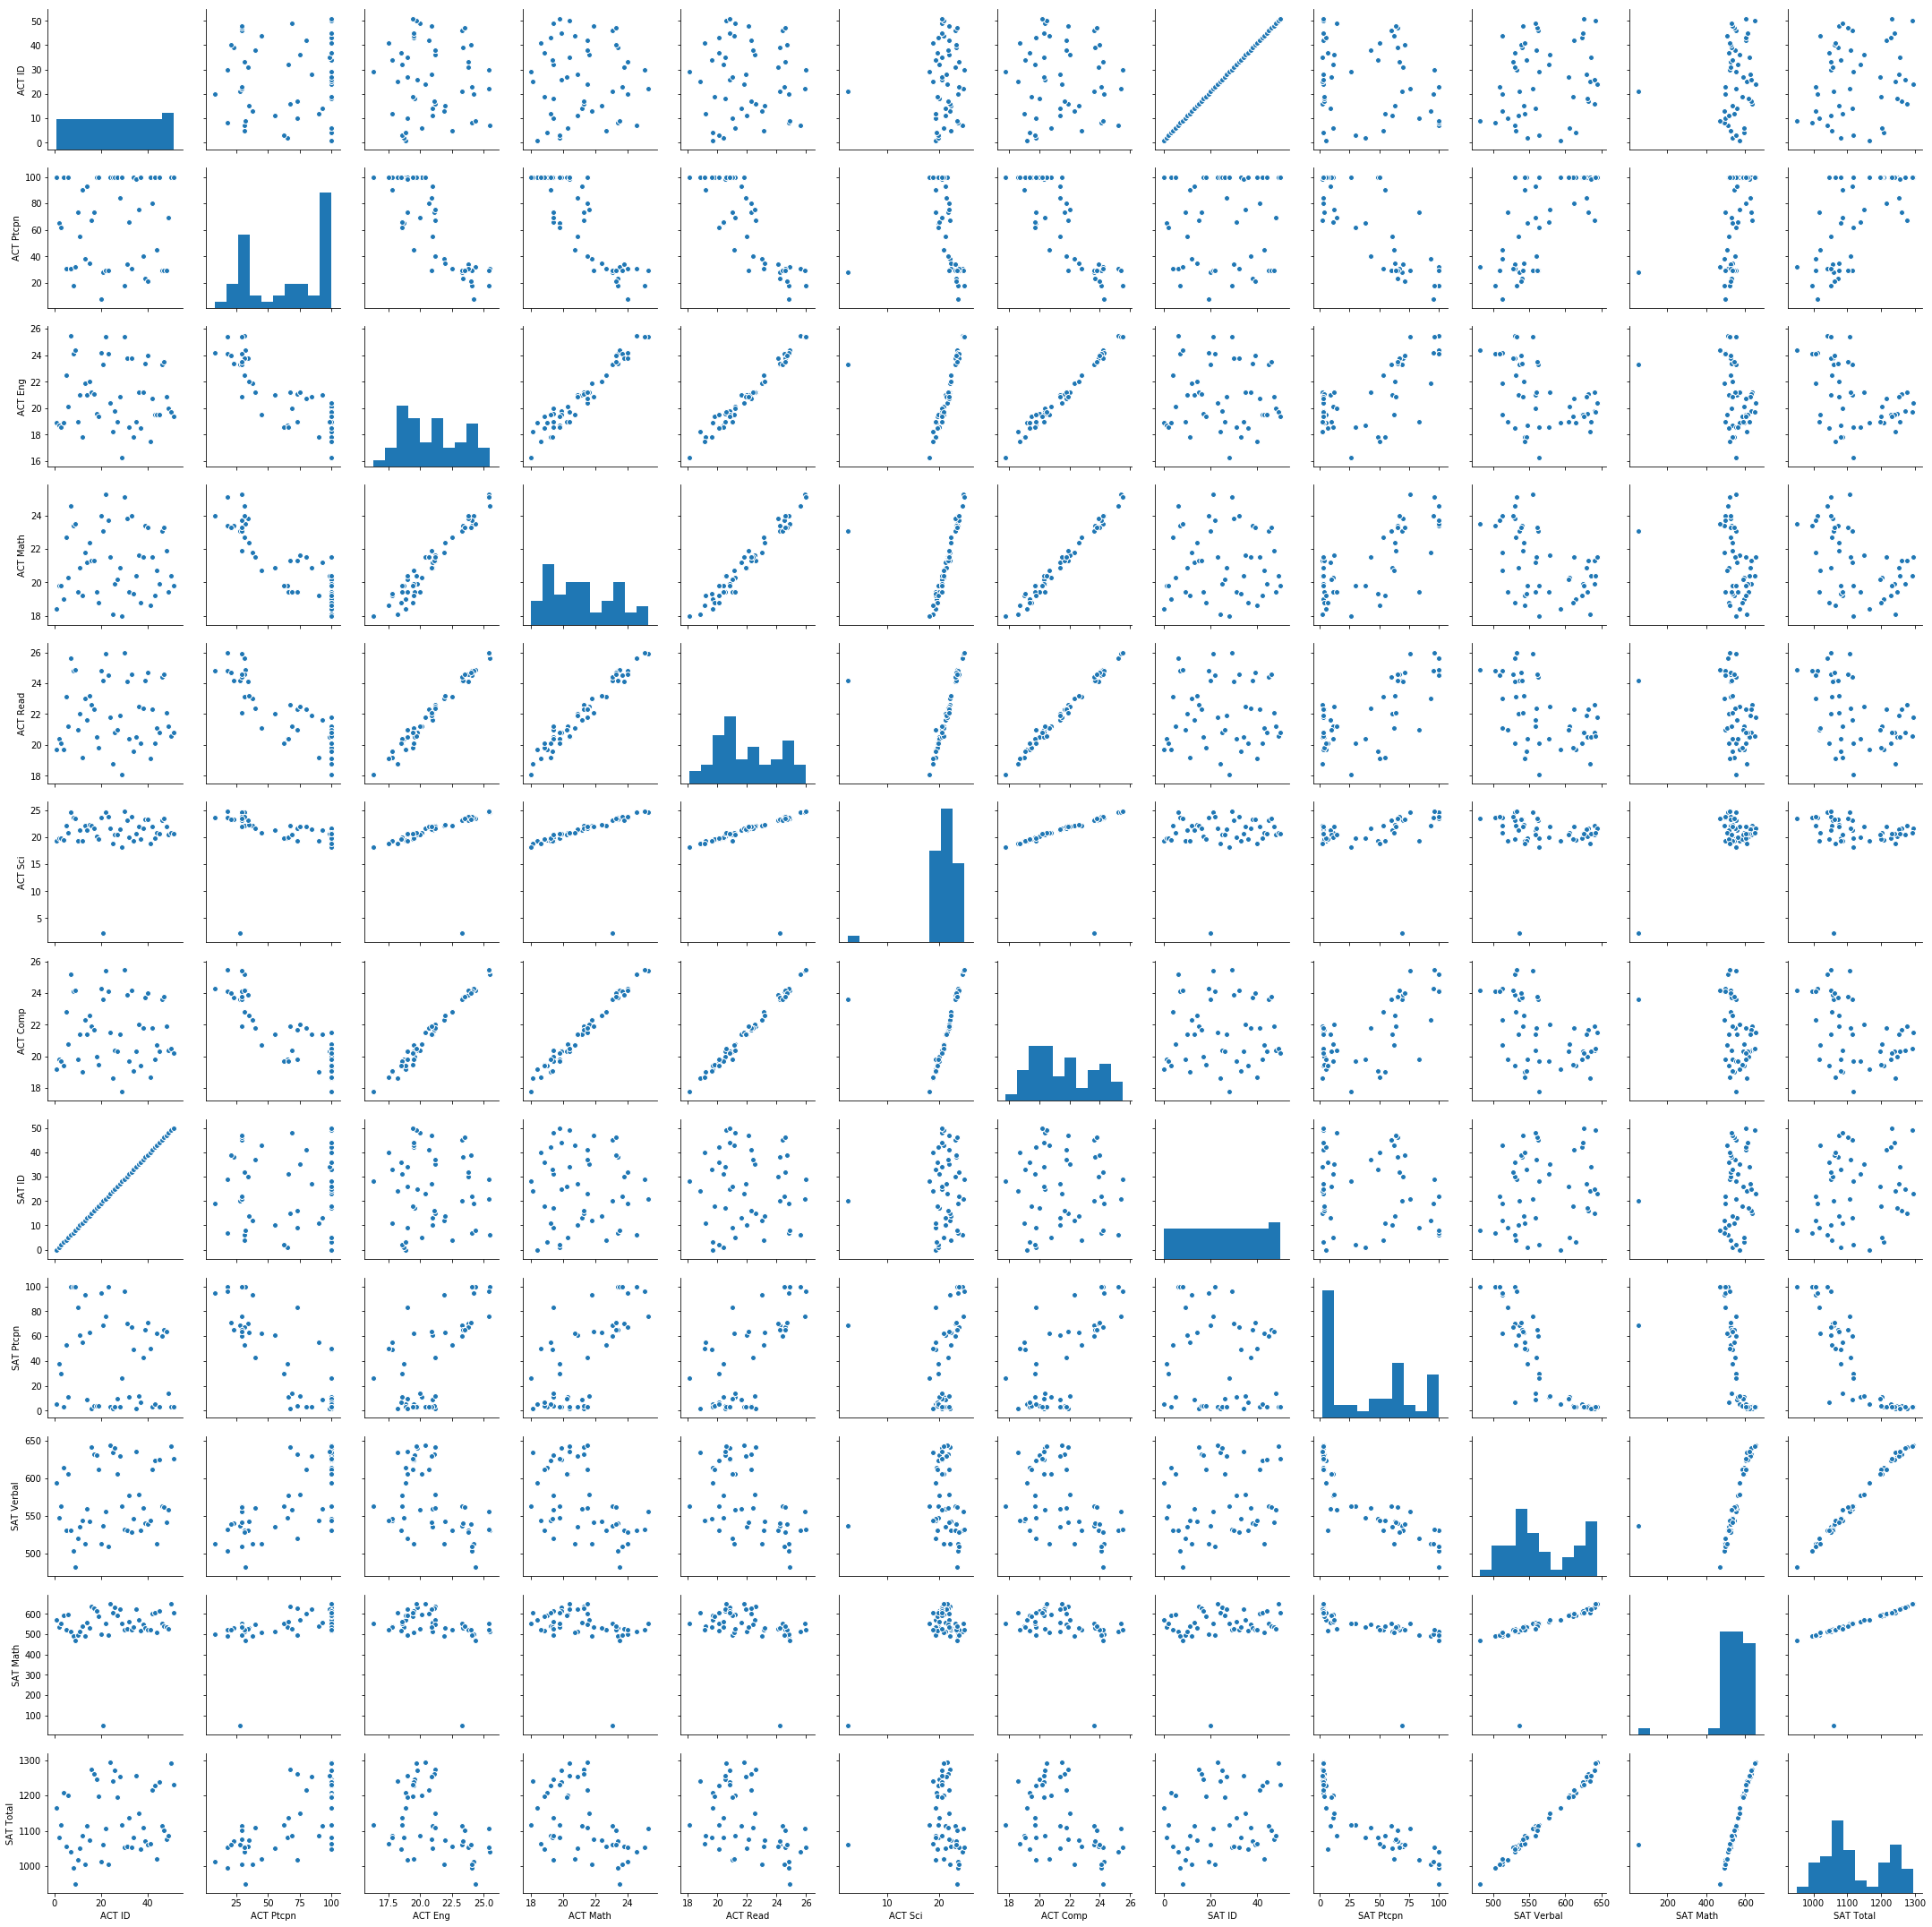

In [21]:
import seaborn as sns
sns.pairplot(act_sat_merge[1:])

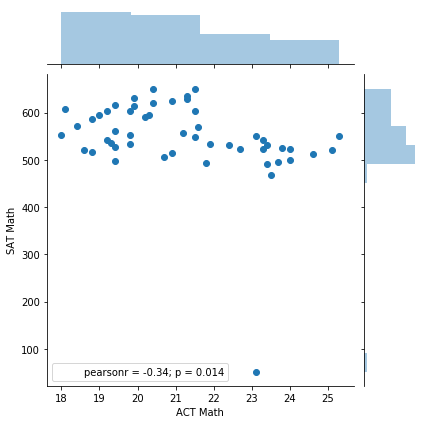

In [26]:
sns.jointplot(x = act_sat_merge['ACT Math'], y = act_sat_merge['SAT Math'])

Moderate negative correlation here.

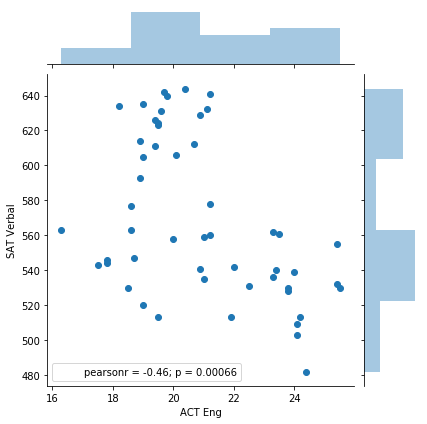

In [27]:
sns.jointplot(x = act_sat_merge['ACT Eng'], y = act_sat_merge['SAT Verbal'])

Moderate negative correlation here as well.

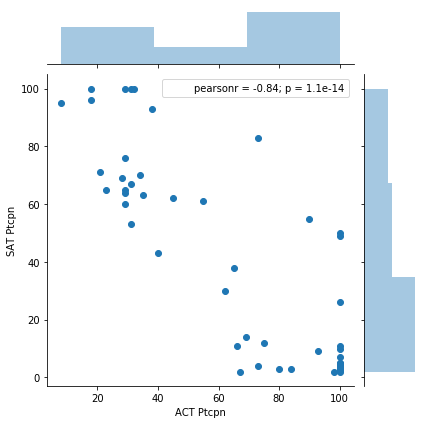

In [28]:
sns.jointplot(x = act_sat_merge['ACT Ptcpn'], y = act_sat_merge['SAT Ptcpn'])

Strong negative correlation here.

##### 22. Are there any interesting relationships to note?

It seems that ACT scores on the different sections are correlated and that SAT scores on the two sections are correlated. James Hampton has suggested to me, plausibly, that there is a significant effect from teachers teaching to the test, so that students who do well on one section tend to do well on all.

Also, the participation rates are strongly negatively correlated. I comment on this below.

##### 23. Create box plots for each variable. 

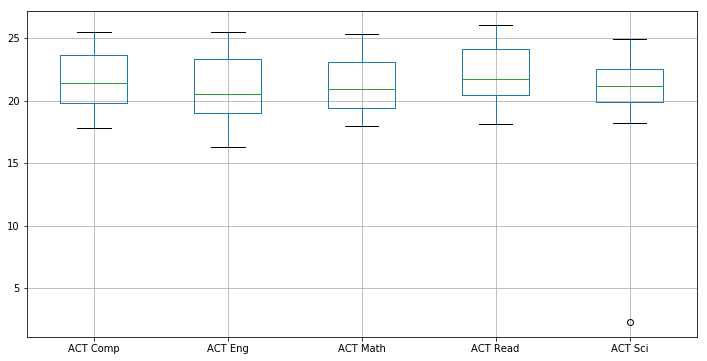

In [22]:
pd.DataFrame.boxplot(act_sat_merge,
                     column = ['ACT Comp', 'ACT Eng', 'ACT Math', 'ACT Read', 'ACT Sci'],
                     figsize = (12, 6));

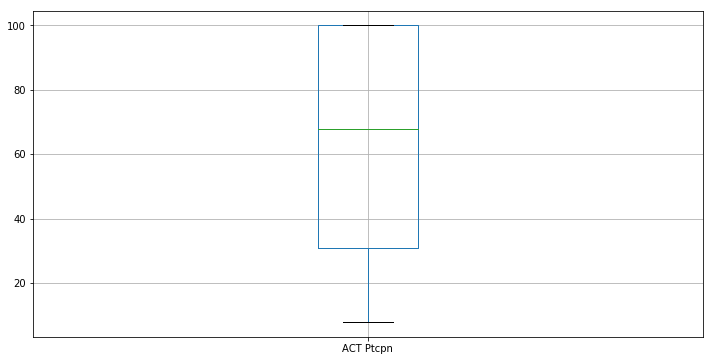

In [23]:
pd.DataFrame.boxplot(act_sat_merge,
                    column = 'ACT Ptcpn',
                    figsize = (12, 6))

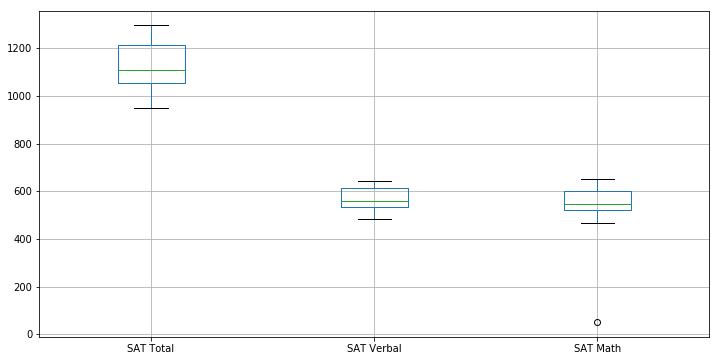

In [27]:
pd.DataFrame.boxplot(act_sat_merge,
                    column = ['SAT Total', 'SAT Verbal', 'SAT Math'],
                    figsize = (12, 6));

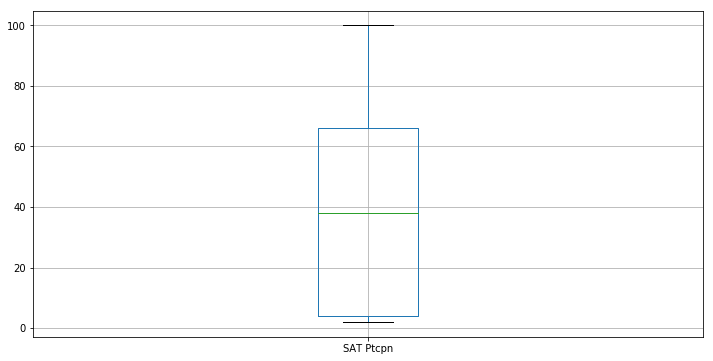

In [28]:
pd.DataFrame.boxplot(act_sat_merge,
                    column = 'SAT Ptcpn',
                    figsize = (12, 6))

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

I don't really know much about Tableau....

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

For each distribution we'll look at center, spread, and shape.

In [7]:
act_sat_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
ACT ID,52.0,25.500000,15.154757,0.0,12.750,25.50,38.250,51.0
ACT Ptcpn,52.0,65.153846,31.832518,8.0,31.000,68.00,100.000,100.0
ACT Eng,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
ACT Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
ACT Read,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
ACT Sci,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9
ACT Comp,52.0,21.509615,2.002083,17.8,19.800,21.40,23.600,25.5
SAT ID,51.0,25.000000,14.866069,0.0,12.500,25.00,37.500,50.0
SAT Ptcpn,51.0,39.803922,35.276632,2.0,4.000,38.00,66.000,100.0
SAT Verbal,51.0,569.117647,45.666901,482.0,533.500,559.00,613.000,644.0


The first thing that stands out to me is that the participation rates are all over the place. The standard deviations are massive, and, in the case of the ACT, the third quartile is already at 100%.

### ACT Scores:

The ACT English score is centered at 21, with a standard deviation of 2.3. This distribution, as we noted above, is plausibly normal.

Similar remarks apply to ACT Math (mean = 21, std = 2.0), ACT Reading (mean = 22, std = 2.0), and ACT Composite (mean = 22, std = 2.0). The ACT Science scores have a serious outlier (the minimum value of 2.3–is this an entry error?) and so their standard deviation is considerably larger (3.2).

### SAT Scores:

The SAT scores, by contrast, don't look so normal. The SAT Verbal distribution looks almost two-peaked. The Math distribution has a major outlier (min = 52), and also has a huge standard deviation of 84.9.

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [10]:
act_sat_merge.corr()

,ACT ID,ACT Ptcpn,ACT Eng,ACT Math,ACT Read,ACT Sci,ACT Comp,SAT ID,SAT Ptcpn,SAT Verbal,SAT Math,SAT Total
ACT ID,1.000000,0.044954,-0.042497,0.003031,-0.004137,0.060748,-0.003651,1.000000,-0.166621,0.169424,0.132920,0.172258
ACT Ptcpn,0.044954,1.000000,-0.841826,-0.859609,-0.864694,-0.304870,-0.856530,0.040686,-0.841234,0.716153,0.507670,0.701477
ACT Eng,-0.042497,-0.841826,1.000000,0.967838,0.986012,0.403239,0.990867,-0.052987,0.686889,-0.461345,-0.345342,-0.441947
ACT Math,0.003031,-0.859609,0.967838,1.000000,0.979632,0.412140,0.990461,-0.005227,0.710697,-0.486126,-0.340906,-0.454116
ACT Read,-0.004137,-0.864694,0.986012,0.979632,1.000000,0.400826,0.995061,-0.014447,0.705352,-0.488441,-0.363099,-0.466558
ACT Sci,0.060748,-0.304870,0.403239,0.412140,0.400826,1.000000,0.408455,0.062100,0.248553,-0.135461,0.594714,-0.121783
ACT Comp,-0.003651,-0.856530,0.990867,0.990461,0.995061,0.408455,1.000000,-0.012583,0.694748,-0.470382,-0.346335,-0.445020
SAT ID,1.000000,0.040686,-0.052987,-0.005227,-0.014447,0.062100,-0.012583,1.000000,-0.166621,0.169424,0.132920,0.172258
SAT Ptcpn,-0.166621,-0.841234,0.686889,0.710697,0.705352,0.248553,0.694748,-0.166621,1.000000,-0.874326,-0.566558,-0.867540
SAT Verbal,0.169424,0.716153,-0.461345,-0.486126,-0.488441,-0.135461,-0.470382,0.169424,-0.874326,1.000000,0.628405,0.996661


### Positive Correlations:
There are very strong positive correlations between ACT Math and ACT English scores, between ACT Reading and ACT English scores (not surprising), between ACT Reading and ACT Math scores, and between ACT Composite scores and the individual section scores save Science. (But, again, the Science scores have a major outlier.)

SAT Participation is also strongly correlated with ACT English, ACT Math, ACT Reading, and ACT Composite scores.
SAT Verbal is strongly correlated with ACT Participation, as is SAT Math, which is also correlated with ACT Science and SAT Verbal. SAT Total is correlated with ACT Participation, SAT Verbal and SAT Math.

(Obviously, it's no surprise that ACT Composites and SAT Totals are correlated positively with scores on the different sections of the respective tests.)

### Negative Correlations:
ACT Participation is strongly negatively correlated with ACT scores in general (!). Thus states with lower rates tend to have higher scores. Presumably this is a matter of selective reporting. The same phenomenon occurs with SAT scores and Participation.

Also of note is that SAT Participation is strongly negatively correlated with ACT Participation. This is to say that few students take both exams. Speaking for myself, however, I took both.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

Our null hypothesis will be that there is no difference in partcipation rates between the SAT and the ACT. The alternative hypothesis will be that there is a difference.

Our level of significance is $\alpha = 0.05$.

We need now to calculate our estimates.

In [63]:
import numpy as np

In [64]:
print(np.mean(act_sat_merge['ACT Ptcpn']))
print(np.mean(act_sat_merge['SAT Ptcpn']))

65.15384615384616
39.80392156862745


In [11]:
import scipy.stats as stats
result = stats.ttest_ind(act_sat_merge['ACT Ptcpn'][1:], act_sat_merge['SAT Ptcpn'][1:])
result.statistic, result.pvalue

(3.8085778908170544, 0.00024134203698662353)

Our p-value here is 0.02%, far below our threshold of 5%. We are therefore justified in rejecting the null hypothesis and accepting that there is a statistically significant difference between the participation rates of the two tests.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [66]:
mean_act = np.mean(act_sat_merge['ACT Ptcpn'])
mean_sat = np.mean(act_sat_merge['SAT Ptcpn'])
sd_act = np.std(act_sat_merge['ACT Ptcpn'])
sd_sat = np.std(act_sat_merge['SAT Ptcpn'])
sdom_act = sd_act / np.sqrt(len(act_sat_merge['ACT Ptcpn']) - 1)
sdom_sat = sd_sat / np.sqrt(len(act_sat_merge['SAT Ptcpn']))

stats.norm.interval(0.95, mean_act, sdom_act)

(56.501828195869166, 73.80586411182315)

In [67]:
stats.norm.interval(0.95, mean_sat, sdom_sat)

(30.310266439944627, 49.29757669731028)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

I'd say 'no'. The intervals don't overlap. We can be very confident that the true mean participation rates have a large difference.

One complication here is that we are treating the participation rates of all states equally, whereas the true mean would need to weight the more populous states more heavily. Still, there is good reason to think that there is a significant difference between the two tests' rates.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

Interestingly enough, there is a moderate negative correlation between the math scores on the two tests. But it's far from clear that it is after all appropriate to generate a correlation between the two since they are on different scales. Given also the fact that relatively few students took both exams, it seems problematic that we're comparing students' performances with different students' performances.

One thing we might do is to standardize the scores by subtracting the (respective) mean from each score and then dividing by the (repsective) standard deviation.

So we might try the following:

In [22]:
act_math_stan = (act_sat_merge['ACT Math'][1:] - np.mean(act_sat_merge['ACT Math'][1:])) / np.std(act_sat_merge['ACT Math'][1:], ddof = 1)

In [23]:
sat_math_stan = (act_sat_merge['SAT Math'] - np.mean(act_sat_merge['SAT Math'])) / np.std(act_sat_merge['SAT Math'], ddof = 1)

In [36]:
keys = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY',
       'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK'
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
act_math_dict = dict(zip(keys, act_math_stan))
sat_math_dict = dict(zip(keys, sat_math_stan))

In [37]:
for key, value in act_math_dict.items():
    act_math_dict[key] = list([value])

In [38]:
for key, value in sat_math_dict.items():
    sat_math_dict[key] = list([value])

In [40]:
act_df = pd.DataFrame(act_math_dict)

In [41]:
sat_df = pd.DataFrame(sat_math_dict)

In [44]:
math_df = pd.concat([act_df, sat_df])

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

I would say that our data are relatively limited.

To begin, we don't have any evidence that testing conditions for the one were sufficiently similar to those for the other. If the goal is to test the idea that SAT and ACT data be "similar" by some metric or another, then we should want to know that the data are being generated by similar processes.

Moreover, the data themselves we may suspect of being misleading. Given that our entries are state averages, for example, we are also sacrificing information about pure numbers. As noted above, states have (very) different populations, and so it seems perverse to treat, say, California's average as on a par with, say, Vermont's. We could make similar remarks about the divergence in particpation rates (which, at least, are included in our dataset). Namely, small states with low participation rates could constitute, from a number-of-exams-taken point of view, truly insiginificant sample sizes, whereas we are treating them here just like we treat large states with high participation rates.

Finally, if 'statistical inference' is a matter of extending our results to unobserved cases or to the population at large, then the nature of this extension remains unclear. We have, after all, data for all 50 states and DC. Perhaps there is significant taking of SATs and ACTs by high school students in overseas territories like Guam and Puerto Rico?